# GRAE tests
-> Implemented manually as the import has dependency flaws

# Run Tests

In [1]:
from Main.test_manifold_algorithms import test_manifold_algorithms as tma
from mashspud import SPUD 
from Helpers.Grae import *
dc = tma("iris.csv", split = "distort", verbose = 3)
spud = SPUD()
spud.fit(dc.split_A, dc.split_B, known_anchors=dc.anchors[:10])
spud.get_scores(dc.labels_doubled)

MDS initialized with 4 components

 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------

The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)


(0.00035555555555555557, 0.9566666666666667, 0.9633333333333334)

In [2]:
# Fit it to a BaseDataset
split_A = BaseDataset(x = dc.split_A, y = dc.labels, split_ratio = 0.8, random_state = 42, split = "none")

In [3]:
myGrae = GRAEBase()
# Input data should be an instance of grae.data.BaseDataset
myGrae.fit(split_A, emb=spud.emb[:spud.len_A]) #This fit might be expecting labels

       Fitting GRAE...
           Fitting manifold learning embedding...
           Fitting encoder & decoder...


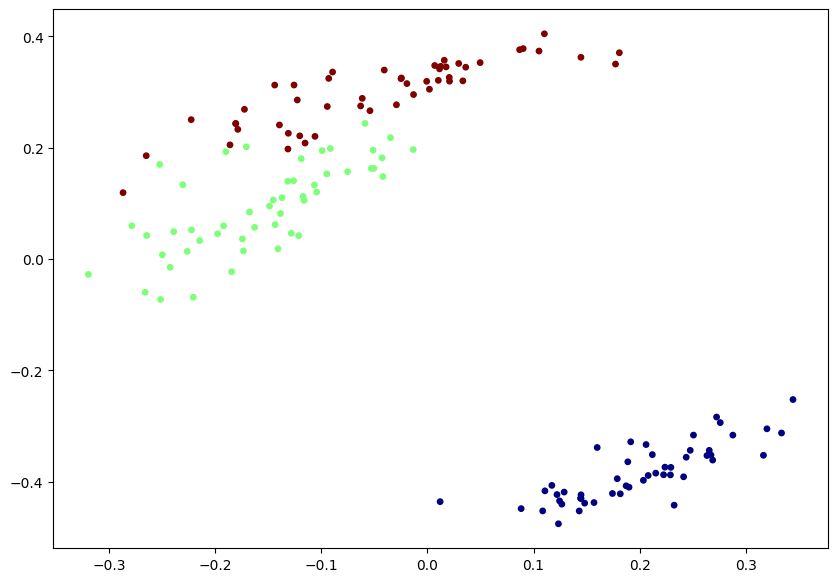

In [4]:
myGrae.plot(split_A)

### Test with second domain?

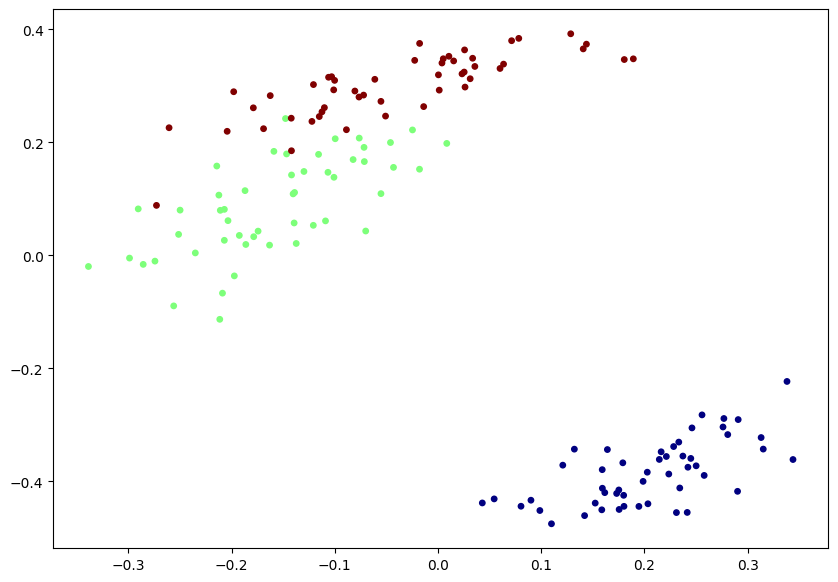

In [5]:
split_B = BaseDataset(x = dc.split_B, y = dc.labels, split_ratio = 0.8, random_state = 42, split = "none")
myGrae.plot(split_B)

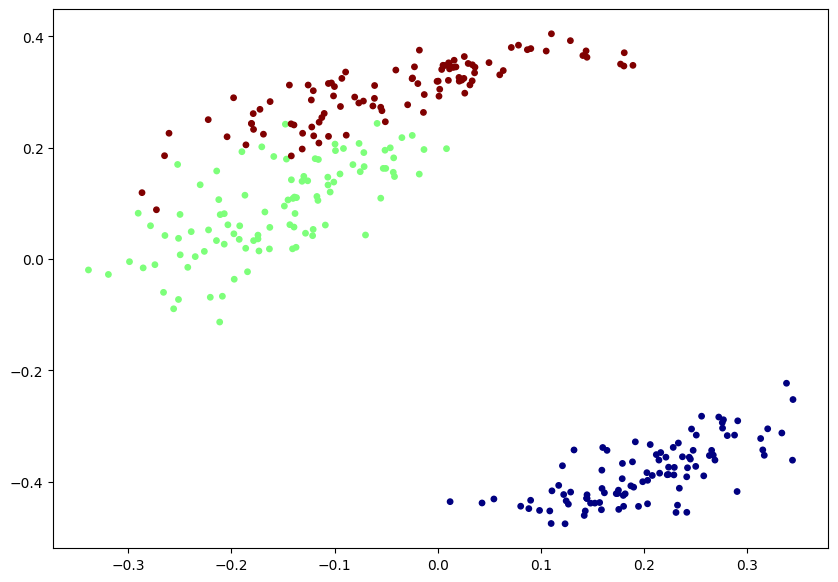

In [6]:
full_data = BaseDataset(x = np.vstack([dc.split_A, dc.split_B]), y = dc.labels_doubled, split_ratio = 0.8, random_state = 42, split = "none")
myGrae.plot(full_data)

# RF GAP Testing